In [1]:
from PySeirCampus.construct_SEIRPublicData import *
import pandas as pd
import copy
import math

In [2]:
distance_matrix_file = "C:/Users/ys954/Documents/Github/CityEpidemiologyModeling/SEIR-Campus-master/DistanceMatrix/distance_matrix1.csv"

In [3]:
distance_matrix_df = pd.read_csv(distance_matrix_file, header = None)

for index, row in distance_matrix_df.iterrows():
    for column in range(len(row)):           
        distance_matrix_df.iloc[index,column] /= 1000 # from meter to km 

distance_matrix_df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.000000,0.185042,0.671059,1.085272,1.485059,0.184150,0.261059,0.671059,1.085272,1.485059,...,1.076982,1.077059,1.487059,1.901272,2.301059,1.484982,1.485059,1.895059,2.309272,2.709059
1,0.205025,0.000000,0.204975,0.689847,1.089634,0.275672,0.184281,0.275634,0.689847,1.089634,...,1.091672,1.091672,1.091634,1.505847,1.905634,1.499672,1.499672,1.499634,1.913847,2.313634
2,0.687249,0.207132,0.000000,0.207081,0.677100,0.687351,0.277351,0.184445,0.277313,0.677100,...,1.503351,1.093351,1.093351,1.093313,1.493100,1.911351,1.501351,1.501351,1.501313,1.901100
3,1.096228,0.686228,0.199917,0.000000,0.199870,1.096328,0.686328,0.272115,0.184607,0.272080,...,1.912328,1.502328,1.088115,1.088115,1.088080,2.320328,1.910328,1.496115,1.496115,1.496080
4,1.498383,1.088383,0.674170,0.202963,0.000000,1.498454,1.088454,0.674240,0.274454,0.184745,...,2.314454,1.904454,1.490240,1.090454,1.090527,2.722454,2.312454,1.898240,1.498454,1.498527
5,0.203975,0.275315,0.685315,1.099528,1.499315,0.000000,0.184912,0.685315,1.099528,1.499315,...,0.683235,0.683352,1.093352,1.507565,1.907352,1.091235,1.091352,1.501352,1.915565,2.315352
6,0.289207,0.204005,0.289215,0.703428,1.103215,0.204995,0.000000,0.205005,0.703428,1.103215,...,0.697200,0.697200,0.697208,1.111421,1.511208,1.105200,1.105200,1.105208,1.519421,1.919208
7,0.700704,0.290704,0.204005,0.290712,0.690498,0.700697,0.207102,0.000000,0.207112,0.690498,...,1.108697,0.698697,0.698697,0.698705,1.098491,1.516697,1.106697,1.106697,1.106705,1.506491
8,1.109824,0.699824,0.285611,0.204005,0.285618,1.109817,0.699817,0.199888,0.000000,0.199898,...,1.517817,1.107817,0.693603,0.693603,0.693610,1.925817,1.515817,1.101603,1.101603,1.101610
9,1.511878,1.101878,0.687665,0.287878,0.204032,1.511878,1.101878,0.687620,0.203088,0.000000,...,1.919833,1.509833,1.095620,0.695833,0.695955,2.327833,1.917833,1.503620,1.103833,1.103956


In [4]:
moving_speed = 3.0 # unist is km/hr
F_df = distance_matrix_df

for index, row in F_df.iterrows():
    for column in range(len(row)):
        distance = row[column]            
        time = distance/moving_speed
        F = pow(time, -3.993) * math.exp(-0.019 * time)      
        F_df.iloc[index,column] = F

F_df

C:\Users\ys954\AppData\Local\Temp\ipykernel_41032\1203876510.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  F = pow(time, -3.993) * math.exp(-0.019 * time)


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,inf,6.767488e+04,3.935907e+02,5.757776e+01,1.641679e+01,6.899379e+04,1.711559e+04,3.935907e+02,5.757776e+01,1.641679e+01,...,5.937099e+01,5.935413e+01,1.632860e+01,6.105091e+00,2.842096e+00,1.642017e+01,1.641679e+01,6.185652e+00,2.801803e+00,1.477236e+00
1,4.492978e+04,inf,4.497405e+04,3.524582e+02,5.666130e+01,1.376898e+04,6.879796e+04,1.377649e+04,3.524582e+02,5.666130e+01,...,5.623946e+01,5.623946e+01,5.624721e+01,1.552831e+01,6.049312e+00,1.578584e+01,1.578584e+01,1.578742e+01,5.946008e+00,2.780692e+00
2,3.578138e+02,4.313173e+04,inf,4.317474e+04,3.797406e+02,3.576018e+02,1.343886e+04,6.855385e+04,1.344633e+04,3.797406e+02,...,1.563175e+01,5.589464e+01,5.589464e+01,5.590254e+01,1.606578e+01,5.977164e+00,1.571526e+01,1.571526e+01,1.571688e+01,6.107306e+00
3,5.531020e+01,3.599472e+02,4.969366e+04,inf,4.974081e+04,5.529004e+01,3.597375e+02,1.450206e+04,6.831387e+04,1.450949e+04,...,5.964945e+00,1.567440e+01,5.697833e+01,5.697833e+01,5.698564e+01,2.748680e+00,5.989996e+00,1.593657e+01,1.593657e+01,1.593806e+01
4,1.584025e+01,5.692229e+01,3.863810e+02,4.678112e+04,inf,1.583726e+01,5.690749e+01,3.862187e+02,1.401471e+04,6.811014e+04,...,2.776748e+00,6.064343e+00,1.618951e+01,5.649115e+01,5.647592e+01,1.448304e+00,2.786385e+00,6.144232e+00,1.583726e+01,1.583414e+01
5,4.586083e+04,1.384036e+04,3.618683e+02,5.464922e+01,1.580087e+01,inf,6.786481e+04,3.618683e+02,5.464922e+01,1.580087e+01,...,3.662913e+02,3.660419e+02,5.589456e+01,1.545761e+01,6.027522e+00,5.632941e+01,5.630541e+01,1.571525e+01,5.924681e+00,2.772433e+00
6,1.136946e+04,4.583407e+04,1.136835e+04,3.260340e+02,5.392242e+01,4.495631e+04,inf,4.494751e+04,3.260340e+02,5.392242e+01,...,3.378316e+02,3.378316e+02,3.378179e+02,5.234743e+01,1.530902e+01,5.353590e+01,5.353590e+01,5.353452e+01,1.498047e+01,5.879771e+00
7,3.311289e+02,1.113738e+04,4.583407e+04,1.113628e+04,3.511310e+02,3.311421e+02,4.315740e+04,inf,4.314907e+04,3.511310e+02,...,5.286364e+01,3.349475e+02,3.349475e+02,3.349338e+02,5.485580e+01,1.508842e+01,5.324682e+01,5.324682e+01,5.324545e+01,1.550174e+01
8,5.264938e+01,3.327978e+02,1.195233e+04,4.583401e+04,1.195115e+04,5.265075e+01,3.328115e+02,4.972222e+04,inf,4.971224e+04,...,1.504395e+01,5.303199e+01,3.448897e+02,3.448897e+02,3.448758e+02,5.799369e+00,1.512355e+01,5.423857e+01,5.423857e+01,5.423719e+01
9,1.528185e+01,5.418445e+01,3.569497e+02,1.158061e+04,4.580968e+04,1.528185e+01,5.418445e+01,3.570443e+02,4.666603e+04,inf,...,5.872105e+00,1.536489e+01,5.543320e+01,3.404938e+02,3.402540e+02,2.713338e+00,5.896670e+00,1.562059e+01,5.380172e+01,5.377779e+01


In [5]:
a = F_df.iloc[0,:]
a = a.to_dict()
a = sorted(a.items(), key=lambda x:x[1], reverse=True)
a = dict(a)
a

{0: inf,
 5: 68993.78787509064,
 1: 67674.88172504012,
 6: 17115.591933748346,
 10: 398.314749228147,
 11: 398.314749228147,
 2: 393.5906795072355,
 7: 393.5906795072355,
 15: 59.37098775588444,
 16: 59.35413046004754,
 12: 58.915327415082345,
 3: 57.5777631303418,
 8: 57.5777631303418,
 20: 16.420168131224052,
 4: 16.416790246533076,
 9: 16.416790246533076,
 21: 16.41679024653131,
 17: 16.328597075838758,
 13: 16.05836754243534,
 14: 6.211866616846104,
 22: 6.185652043427811,
 18: 6.105091010380286,
 19: 2.8420962061022372,
 23: 2.8018027683670215,
 24: 1.477236114135459}

In [6]:
#facility_allocation_file = "C:/Users/Administrator.DESKTOP-D3SVMI5/Documents/GitHub/CityEpidemiologyModeling/SEIR-Campus-master/FacilityAllocation/Grid_Uni_R_Rad_F_25.csv"
#facility_allocation_file = "C:/Users/ys954/Documents/Github/CityEpidemiologyModeling/SEIR-Campus-master/FacilityAllocation/1.Center_Gradient_Grid_Uni_R_Rad_F_25.csv"
#facility_allocation_file = "C:/Users/ys954/Documents/Github/CityEpidemiologyModeling/SEIR-Campus-master/FacilityAllocation/2.Right_Linear_Grid_Uni_R_Rad_F_25.csv"
#facility_allocation_file = "C:/Users/ys954/Documents/Github/CityEpidemiologyModeling/SEIR-Campus-master/FacilityAllocation/3.TwoSides_Linear_Grid_Uni_R_Rad_F_25.csv"
facility_allocation_file = "C:/Users/ys954/Documents/Github/CityEpidemiologyModeling/SEIR-Campus-master/FacilityAllocation/4.Grid_Uni_R_Uni_F_25.csv"



In [7]:
total_population = 100000
total_job_count = 30000

In [8]:
facility_df = generateJobStatusDataFrame(facility_allocation_file, total_job_count, "BlockGroup", 1)
facility_ratio_sum = sum(facility_df.loc[:,"Normalized_Ratio"])
facility_df

,BLOCK_ID,MEETING_TYPE,Normalized_Ratio,JOB_COUNT
0,0,Facilities,0.039462,1184
1,1,Facilities,0.038374,1151
2,2,Facilities,0.042936,1288
3,3,Facilities,0.039611,1188
4,4,Facilities,0.028433,853
5,5,Facilities,0.039336,1180
6,6,Facilities,0.046135,1384
7,7,Facilities,0.040579,1217
8,8,Facilities,0.045129,1354
9,9,Facilities,0.038145,1144


In [9]:
facility_ratio_sum

1.0000000000000002

In [10]:
meeting_type_id_count_dic = get_JOB_TYPE_ID_COUNT(facility_df,1)
meeting_type_id_count_dic

{'Facilities': [{'BLOCK_ID': 0, 'Normalized_Ratio': 0.039462},
  {'BLOCK_ID': 1, 'Normalized_Ratio': 0.038374},
  {'BLOCK_ID': 2, 'Normalized_Ratio': 0.042936},
  {'BLOCK_ID': 3, 'Normalized_Ratio': 0.039611},
  {'BLOCK_ID': 4, 'Normalized_Ratio': 0.028433},
  {'BLOCK_ID': 5, 'Normalized_Ratio': 0.039336},
  {'BLOCK_ID': 6, 'Normalized_Ratio': 0.046135},
  {'BLOCK_ID': 7, 'Normalized_Ratio': 0.040579},
  {'BLOCK_ID': 8, 'Normalized_Ratio': 0.045129},
  {'BLOCK_ID': 9, 'Normalized_Ratio': 0.038145},
  {'BLOCK_ID': 10, 'Normalized_Ratio': 0.043463},
  {'BLOCK_ID': 11, 'Normalized_Ratio': 0.048353},
  {'BLOCK_ID': 12, 'Normalized_Ratio': 0.048544},
  {'BLOCK_ID': 13, 'Normalized_Ratio': 0.032549},
  {'BLOCK_ID': 14, 'Normalized_Ratio': 0.03429},
  {'BLOCK_ID': 15, 'Normalized_Ratio': 0.038819},
  {'BLOCK_ID': 16, 'Normalized_Ratio': 0.039954},
  {'BLOCK_ID': 17, 'Normalized_Ratio': 0.037554},
  {'BLOCK_ID': 18, 'Normalized_Ratio': 0.035177},
  {'BLOCK_ID': 19, 'Normalized_Ratio': 0.03375}

In [11]:
block_ids = facility_df.loc[:,"BLOCK_ID"]
block_population_ratio = [1/len(block_ids) for i in range(0, len(block_ids))]
block_population = [int(total_population/len(block_ids)) for i in range(0, len(block_ids))]

population_data = {"BLOCK_ID":block_ids, "Normalized_Ratio":block_population_ratio,\
                   "POPULATION":block_population}
population_df = pd.DataFrame(population_data)
population_df

,BLOCK_ID,Normalized_Ratio,POPULATION
0,0,0.04,4000
1,1,0.04,4000
2,2,0.04,4000
3,3,0.04,4000
4,4,0.04,4000
5,5,0.04,4000
6,6,0.04,4000
7,7,0.04,4000
8,8,0.04,4000
9,9,0.04,4000


In [12]:
# select blocks within the radius of proximity
def getBlocksWithinProximity(resident_block_id,
                             distance_threshold,
                             moving_speed,
                             population_df,
                             facility_df,
                             dacay_df):    
    distance_list = dacay_df.iloc[resident_block_id,:]
    
    # use distance_threshold to compute distance_decay_threshold
    # use distance_decay_threshold to exclude blocks outside activity range
    time_limit = distance_threshold / moving_speed 
    distance_dacay_threshold = pow(time_limit, -3.993) * math.exp(-0.019 * time_limit)    
    blocks_WithinProximity = [i for i in range(len(distance_list)) if distance_list[i] >= distance_dacay_threshold ]
    return blocks_WithinProximity

# construct roulette wheel for a traveler in block of resident_block_id
def constructRouletteWheel(resident_block_id,
                           blocks_WithinProximity,
                           population_df,
                           facility_df):   
    # the population of this resident's block
    block_population = population_df.loc[resident_block_id, "POPULATION"]
    roulette = {}
    # first part of the roulette wheel will be the block population
    # then aggregate value from the block population
    roulette[-1] = block_population 
    roulette_part_sum = block_population
    
    for block in blocks_WithinProximity:
        facility_job_count = facility_df.loc[block, "JOB_COUNT"]        
        roulette_part_sum += facility_job_count 
        roulette[block] = roulette_part_sum        
    return roulette

# create a route for a traveler in block of resident_block_id
def createRoute(resident_block_id, 
                block_roulette, 
                dest_num):    
    #in the scope of a people
    route = [("HOME", resident_block_id, 1)]
        
    for i in range(2,dest_num):
        # sample a number from the roulette wheel        
        myKeys = list(block_roulette.keys())
        myKeys.sort()
        total_population_within_proximity = block_roulette[myKeys[len(myKeys)-1]]
        sampled_number = random.randrange(0, total_population_within_proximity)
        
        # Check which roulette part the sampled number is in.
        # The total number of roulette parts is equal to the number of blocks plus one
        # traverse through the roulette wheel
        # to find out which part the sampled number is in
        for k in myKeys:
            roulette_part_limit = block_roulette[k]
            if sampled_number <= roulette_part_limit:
                sampled_block_id = None
                sampled_meeting_type = None
                
                if k == -1:
                    sampled_block_id = resident_block_id
                    sampled_meeting_type = "HOME"
                else:    
                    sampled_meeting_type = "Facilities"
                    sampled_block_id = k                    
    
                route.append((sampled_meeting_type, sampled_block_id, i))
                break
                    
    route.append(("HOME", resident_block_id, dest_num))
    return route

In [13]:
blocks_WithinProximity = getBlocksWithinProximity(0, 1000, moving_speed, population_df, facility_df, F_df)
rouletteWheel = constructRouletteWheel(0, blocks_WithinProximity, population_df, facility_df)
a = createRoute(0, rouletteWheel, 5)
a

[('HOME', 0, 1),
 ('Facilities', 1, 2),
 ('Facilities', 23, 3),
 ('Facilities', 14, 4),
 ('HOME', 0, 5)]

In [14]:
# 3 destinations per person
dest_num = 3 # the count of destination per trip
distance_threshold = 1.0 # unit is km/hr

In [15]:
adjusted_F_df = F_df

time_thr = distance_threshold/moving_speed
decay_thr = pow(time_thr, -3.993) * math.exp(-0.019 * time_thr)

for index, row in adjusted_F_df.iterrows():
    for column in range(len(row)):
        distance = row[column]            
        if distance >= decay_thr:      
            continue
        else:
            adjusted_F_df.iloc[index,column] = 0

adjusted_F_df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,inf,6.767488e+04,3.935907e+02,0.000000e+00,0.000000e+00,6.899379e+04,1.711559e+04,3.935907e+02,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,4.492978e+04,inf,4.497405e+04,3.524582e+02,0.000000e+00,1.376898e+04,6.879796e+04,1.377649e+04,3.524582e+02,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,3.578138e+02,4.313173e+04,inf,4.317474e+04,3.797406e+02,3.576018e+02,1.343886e+04,6.855385e+04,1.344633e+04,3.797406e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,3.599472e+02,4.969366e+04,inf,4.974081e+04,0.000000e+00,3.597375e+02,1.450206e+04,6.831387e+04,1.450949e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,3.863810e+02,4.678112e+04,inf,0.000000e+00,0.000000e+00,3.862187e+02,1.401471e+04,6.811014e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,4.586083e+04,1.384036e+04,3.618683e+02,0.000000e+00,0.000000e+00,inf,6.786481e+04,3.618683e+02,0.000000e+00,0.000000e+00,...,3.662913e+02,3.660419e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,1.136946e+04,4.583407e+04,1.136835e+04,3.260340e+02,0.000000e+00,4.495631e+04,inf,4.494751e+04,3.260340e+02,0.000000e+00,...,3.378316e+02,3.378316e+02,3.378179e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,3.311289e+02,1.113738e+04,4.583407e+04,1.113628e+04,3.511310e+02,3.311421e+02,4.315740e+04,inf,4.314907e+04,3.511310e+02,...,0.000000e+00,3.349475e+02,3.349475e+02,3.349338e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,0.000000e+00,3.327978e+02,1.195233e+04,4.583401e+04,1.195115e+04,0.000000e+00,3.328115e+02,4.972222e+04,inf,4.971224e+04,...,0.000000e+00,0.000000e+00,3.448897e+02,3.448897e+02,3.448758e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,0.000000e+00,0.000000e+00,3.569497e+02,1.158061e+04,4.580968e+04,0.000000e+00,0.000000e+00,3.570443e+02,4.666603e+04,inf,...,0.000000e+00,0.000000e+00,0.000000e+00,3.404938e+02,3.402540e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [16]:
adjusted_F_df.iloc[0,:]

0              inf
1     6.767488e+04
2     3.935907e+02
3     0.000000e+00
4     0.000000e+00
5     6.899379e+04
6     1.711559e+04
7     3.935907e+02
8     0.000000e+00
9     0.000000e+00
10    3.983147e+02
11    3.983147e+02
12    0.000000e+00
13    0.000000e+00
14    0.000000e+00
15    0.000000e+00
16    0.000000e+00
17    0.000000e+00
18    0.000000e+00
19    0.000000e+00
20    0.000000e+00
21    0.000000e+00
22    0.000000e+00
23    0.000000e+00
24    0.000000e+00
Name: 0, dtype: float64

In [17]:
%%time

all_trips =[]
iteration = 0

for block_id,row in population_df.iterrows():
    #in the scope of a block

    # how many residents in the block
    # uniformly distributed residents
    residents_in_block = int(row["POPULATION"])
    
    for j in range(0, residents_in_block):
        #in the scope of a people
        
        blocks_WithinProximity = getBlocksWithinProximity(block_id, 
                                                          distance_threshold, 
                                                          moving_speed,
                                                          population_df, facility_df, F_df)
        rouletteWheel = constructRouletteWheel(block_id, 
                                               blocks_WithinProximity, 
                                               population_df, facility_df)
        route = createRoute(block_id, rouletteWheel, dest_num)
        
        dic = {}
        dic["Resident ID"] = iteration
        dic["Route"] = route
        all_trips.append(dic)
        iteration += 1

CPU times: total: 23.9 s
Wall time: 24 s


In [18]:
all_trips

[{'Resident ID': 0,
  'Route': [('HOME', 0, 1), ('Facilities', 11, 2), ('HOME', 0, 3)]},
 {'Resident ID': 1,
  'Route': [('HOME', 0, 1), ('Facilities', 11, 2), ('HOME', 0, 3)]},
 {'Resident ID': 2,
  'Route': [('HOME', 0, 1), ('Facilities', 0, 2), ('HOME', 0, 3)]},
 {'Resident ID': 3, 'Route': [('HOME', 0, 1), ('HOME', 0, 2), ('HOME', 0, 3)]},
 {'Resident ID': 4,
  'Route': [('HOME', 0, 1), ('Facilities', 0, 2), ('HOME', 0, 3)]},
 {'Resident ID': 5,
  'Route': [('HOME', 0, 1), ('Facilities', 0, 2), ('HOME', 0, 3)]},
 {'Resident ID': 6, 'Route': [('HOME', 0, 1), ('HOME', 0, 2), ('HOME', 0, 3)]},
 {'Resident ID': 7,
  'Route': [('HOME', 0, 1), ('Facilities', 6, 2), ('HOME', 0, 3)]},
 {'Resident ID': 8,
  'Route': [('HOME', 0, 1), ('Facilities', 1, 2), ('HOME', 0, 3)]},
 {'Resident ID': 9,
  'Route': [('HOME', 0, 1), ('Facilities', 6, 2), ('HOME', 0, 3)]},
 {'Resident ID': 10,
  'Route': [('HOME', 0, 1), ('Facilities', 2, 2), ('HOME', 0, 3)]},
 {'Resident ID': 11,
  'Route': [('HOME', 0, 

In [19]:
%%time

all_meeting_types = ["HOME", "Facilities"]
meetings = constructSEIR_PublicData(all_trips, 
                                    all_meeting_types,
                                    dest_num,
                                    meeting_duration = 5,
                                    start_date="9/2/2020", 
                                    end_date="11/13/2021")

CPU times: total: 11.1 s
Wall time: 11.2 s


In [20]:
meetings

[{'meeting': {'id': 'HOME 0.1',
   'info': {'name': 'HOME 0.1'},
   'meets': [('9/2/2020',
     '11/13/2021',
     ['M', 'T', 'W', 'R', 'F', 'S', 'U'],
     5)],
   'members': [0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
    24,
    25,
    26,
    27,
    28,
    29,
    30,
    31,
    32,
    33,
    34,
    35,
    36,
    37,
    38,
    39,
    40,
    41,
    42,
    43,
    44,
    45,
    46,
    47,
    48,
    49,
    50,
    51,
    52,
    53,
    54,
    55,
    56,
    57,
    58,
    59,
    60,
    61,
    62,
    63,
    64,
    65,
    66,
    67,
    68,
    69,
    70,
    71,
    72,
    73,
    74,
    75,
    76,
    77,
    78,
    79,
    80,
    81,
    82,
    83,
    84,
    85,
    86,
    87,
    88,
    89,
    90,
    91,
    92,
    93,
    94,
    95,
    96,
    97,
    98,
    99,
    100,
    101,
    102,
    103,
 

In [21]:
meeting_names = []
s = 0
for meeting in meetings:
    ID = meeting["meeting"]["id"]
    if ".1" in ID: 
        s += len(meeting["meeting"]["members"])
    meeting_names.append(ID)

print(len(meeting_names))
meeting_names

100


['HOME 0.1',
 'HOME 0.2',
 'HOME 0.3',
 'HOME 1.1',
 'HOME 1.2',
 'HOME 1.3',
 'HOME 2.1',
 'HOME 2.2',
 'HOME 2.3',
 'HOME 3.1',
 'HOME 3.2',
 'HOME 3.3',
 'HOME 4.1',
 'HOME 4.2',
 'HOME 4.3',
 'HOME 5.1',
 'HOME 5.2',
 'HOME 5.3',
 'HOME 6.1',
 'HOME 6.2',
 'HOME 6.3',
 'HOME 7.1',
 'HOME 7.2',
 'HOME 7.3',
 'HOME 8.1',
 'HOME 8.2',
 'HOME 8.3',
 'HOME 9.1',
 'HOME 9.2',
 'HOME 9.3',
 'HOME 10.1',
 'HOME 10.2',
 'HOME 10.3',
 'HOME 11.1',
 'HOME 11.2',
 'HOME 11.3',
 'HOME 12.1',
 'HOME 12.2',
 'HOME 12.3',
 'HOME 13.1',
 'HOME 13.2',
 'HOME 13.3',
 'HOME 14.1',
 'HOME 14.2',
 'HOME 14.3',
 'HOME 15.1',
 'HOME 15.2',
 'HOME 15.3',
 'HOME 16.1',
 'HOME 16.2',
 'HOME 16.3',
 'HOME 17.1',
 'HOME 17.2',
 'HOME 17.3',
 'HOME 18.1',
 'HOME 18.2',
 'HOME 18.3',
 'HOME 19.1',
 'HOME 19.2',
 'HOME 19.3',
 'HOME 20.1',
 'HOME 20.2',
 'HOME 20.3',
 'HOME 21.1',
 'HOME 21.2',
 'HOME 21.3',
 'HOME 22.1',
 'HOME 22.2',
 'HOME 22.3',
 'HOME 23.1',
 'HOME 23.2',
 'HOME 23.3',
 'HOME 24.1',
 'HOME 2

In [22]:
# output_folder_path = "C:/Users/Administrator.DESKTOP-D3SVMI5/"+\
# "Documents/Jupyter_Notebook/09282022_SEIR/SEIR-Campus-master/events"

output_folder_path = "C:/Users/ys954/Documents/Github/CityEpidemiologyModeling/SEIR-Campus-master/Events"

##########################Write data into a .data file#######################
output_file = output_folder_path + "/" + "meetings" + str(0) + ".data"

# isExist = os.path.exists(output_file)
# if isExist:
#     for j in range(0, 99999999):
#         localName = output_folder_path + "/" + "meetings" + str(j) + ".data"
#         if localName == output_file:
#             continue
            
#         if os.path.exists(localName)==False:
#             output_file = localName
#             break
            
    
o_file = open(output_file,"w")

student_lst = createStudentList(total_population)
for student in student_lst:
    o_file.write(str(student)+"\n")


for meeting in meetings:
    members = meeting["meeting"]["members"]
    o_file.write(str(meeting)+"\n")    

    
o_file.close()

In [23]:
from datetime import datetime, timedelta
from PySeirCampus import *
import os
import re
import seaborn as sb

In [24]:
holiday_list = [(2020, 10, 14)]
holidays = set(datetime(*h) for h in holiday_list)
#semester = Semester('publicdata.data', holidays)

In [25]:
# generated_meetings_folder = "C:/Users/Administrator.DESKTOP-D3SVMI5/Documents/Jupyter_Notebook/09282022_SEIR/SEIR-Campus-master/events"

# generated_meetings_folder = "C:/Users/Administrator.DESKTOP-D3SVMI5/Documents/"+\
#                             "Jupyter_Notebook/09282022_SEIR/SEIR-Campus-master/events"+\
#                             "/5kMeal_1kHousing_2kRecrea_3kOffice_2kOther"

generated_meetings_folder = "C:/Users/ys954/Documents/Github/CityEpidemiologyModeling/SEIR-Campus-master/Events"

meeting_files = os.listdir(generated_meetings_folder) 

#Filtering only the data files.
meetings_files = [generated_meetings_folder + "/" + f for f in meeting_files if f.endswith(".data")] 
meetings_files

['C:/Users/ys954/Documents/Github/CityEpidemiologyModeling/SEIR-Campus-master/Events/meetings0.data']

In [26]:
semester = Semester(meetings_files[0], holidays)

parameters = Parameters(reps = 30)
parameters.initial_exposure = 1

rate_multiplier = 0
parameters.rate *= (1 + rate_multiplier) # the unit of rate is per minute
#1/(65.6*60*7)

parameters.infection_duration = BasicInfectionDuration(rate_contagious=1/3.5, 
                                                       rate_recovery=1/5)

parameters.start_date = datetime(2020,9,2)
parameters.end_date = datetime(2021,1,13)

parameters.info()

verbose = False
rate = 4e-05
daily_spontaneous_prob = 0
contact_tracing = DefaultContactTracing(no action)
intervention_policy = DefaultInterventionPolicy(no intervention)
infection_duration = <PySeirCampus.BasicInfectionDuration object at 0x00000288D8107A00>
quarantine_length = 14
preclass_interaction_time = 0
initial_exposure = 1
preprocess = <function Parameters.__init__.<locals>.<lambda> at 0x00000288DD9AAAF0>
repetitions = 30
start_date = 2020-09-02 00:00:00
end_date = 2021-01-13 00:00:00
vaccine_benefit_self = 0.9
vaccine_benefit_others = 0.5


Semester object with 100000 students, 100 courses, and 0 groups.
Course sizes: min 533 , avg 3000.0 , max 6027
Course durations: min 5.0 , avg 5.0 , max 5.0


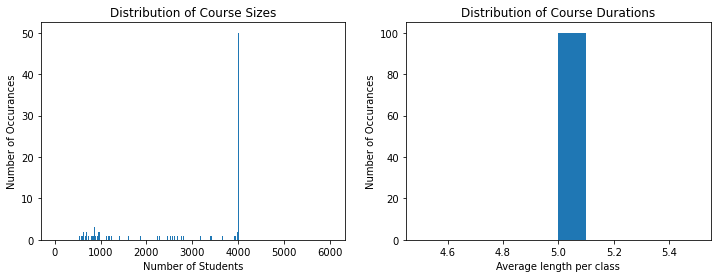

In [27]:
semester.summarize()

Running 30 repetitions.
Initial exposed: 1
Average final exposure count is 96654.56666666667
Sample Standard deviation is: 18254.755946542155
Quarantine: max 0.0 , avg 0.0


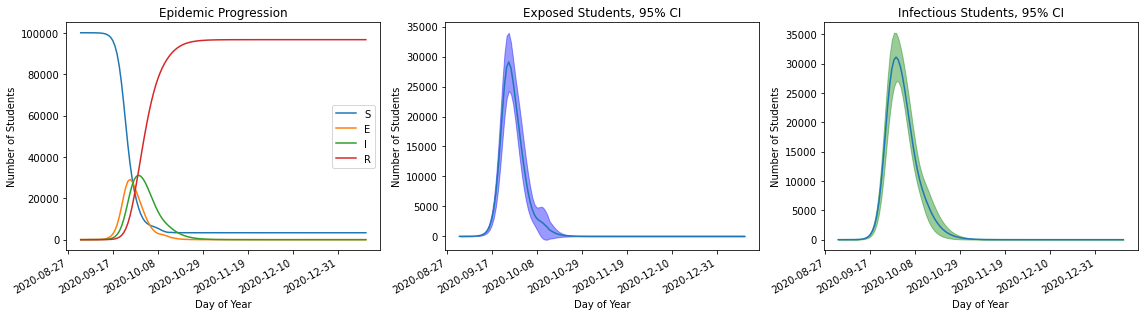

In [28]:
run_repetitions(semester, parameters)

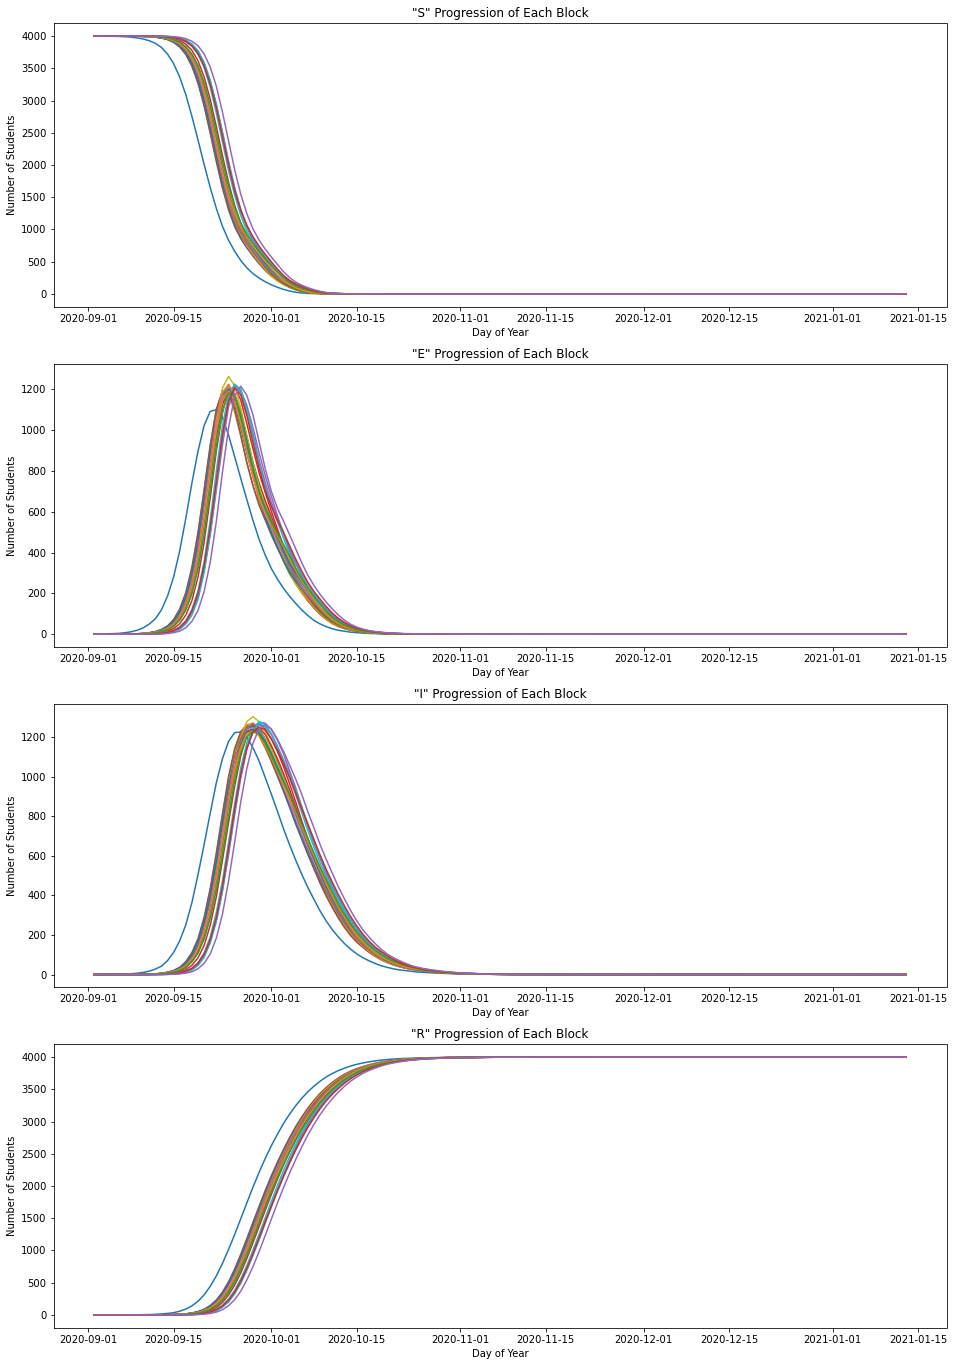

In [29]:
# initial_exposed_students is a list that contains students' id number
initial_exposed_students = [0]
stats_dic = run_and_specify_ini_exp_students(semester, parameters,
                                             initial_exposed_students)

In [30]:
Ss = {} 
Es = {}
Is = {}
Rs = {}

for block, stats in stats_dic["S_blocks_stats"].items():
        Ss[block] = np.mean(stats,axis=0).tolist()
for block, stats in stats_dic["E_blocks_stats"].items():
        Es[block] = np.mean(stats,axis=0).tolist()
for block, stats in stats_dic["I_blocks_stats"].items():
        Is[block] = np.mean(stats,axis=0).tolist()
for block, stats in stats_dic["R_blocks_stats"].items():
        Rs[block] = np.mean(stats,axis=0).tolist()

stats_dic = {"Ss":Ss, "Es":Es, "Is":Is, "Rs":Rs}

In [31]:
# S_output_folder_path = "C:/Users/Administrator.DESKTOP-D3SVMI5/Documents/"+\
#                         "Jupyter_Notebook/09282022_SEIR/SEIR-Campus-master/events/S"
# E_output_folder_path = "C:/Users/Administrator.DESKTOP-D3SVMI5/Documents/"+\
#                         "Jupyter_Notebook/09282022_SEIR/SEIR-Campus-master/events/E"
# I_output_folder_path = "C:/Users/Administrator.DESKTOP-D3SVMI5/Documents/"+\
#                         "Jupyter_Notebook/09282022_SEIR/SEIR-Campus-master/events/I"
# R_output_folder_path = "C:/Users/Administrator.DESKTOP-D3SVMI5/Documents/"+\
#                         "Jupyter_Notebook/09282022_SEIR/SEIR-Campus-master/events/R"

I_output_folder_path = "C:/Users/ys954/Documents/Github/CityEpidemiologyModeling/SEIR-Campus-master/Propogation/I/"
                        

# S_output_file = S_output_folder_path + ".data"
# E_output_file = E_output_folder_path + ".data"
# I_output_file = I_output_folder_path + ".data"
# R_output_file = R_output_folder_path + ".data"

#trial = "1_Center_Gradient_Grid_Uni_R_Rad_F_25"
#trial = "2_Right_Linear_Grid_Uni_R_Rad_F_25"
#trial = "3_TwoSides_Linear_Grid_Uni_R_Rad_F_25"
trial = "4_Grid_Uni_R_Uni_F_25"

I_output_file = I_output_folder_path + trial + ".data"

for name, stats in stats_dic.items():
    file = None
    
    if name == "Ss":
        #file = S_output_file
        continue
    elif name == "Es":
        #file = E_output_file
        continue
    elif name == "Is":
        file = I_output_file
    elif name == "Rs":
        #file = R_output_file
        continue
    else:
        raise Exception("There is a typo. file name should choose from ['S','E','I','R']")

        
    o_file = open(file,"w")## choose which file to write

    for key,value in stats.items():
        o_file.write(str(key)+":"+str(value)+"\n") 

    o_file.close()